# Julia for Data Science

* Data
* Data processing
* **Visualization**

### Data visualization: generating nice looking plots in Julia is straight forward
In what's next, we will see some of the tools that Julia plotting provides to produce high quality figures for your data.

## Part 1: plot math (specifically latex equations) in our plots

In [1]:
using LaTeXStrings
using Plots

pyplot(leg=false)
x = 1:0.2:4

1.0:0.2:4.0

Create three functions and plot them all!

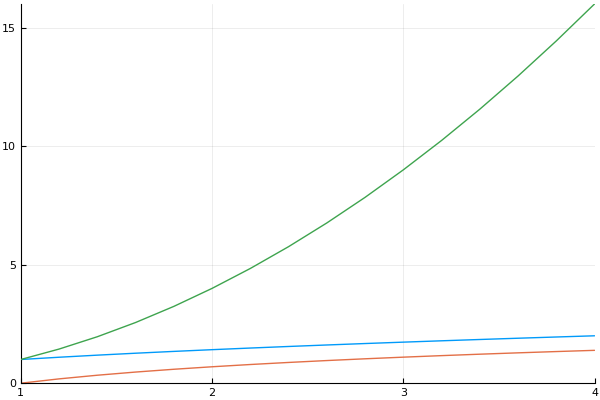

In [2]:
y1 = sqrt.(x)
y2 = log.(x)
y3 = x.^2

f1 = plot(x,y1)
plot!(f1,x,y2) # "plot!" means "plot on the same canvas we just plot on"
plot!(f1,x,y3)

Now we can annotate each of these plots! using either text, or latex strings

In [6]:
L"\lim_{x \to \infty} \sqrt{x^2 + y^2}"

L"$\lim_{x \to \infty} \sqrt{x^2 + y^2}$"

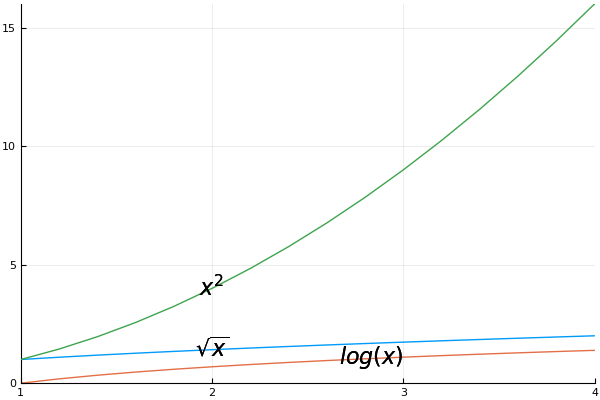

In [7]:
annotate!(f1,[(x[6],y1[6],text(L"\sqrt{x}",16,:center)),
          (x[11],y2[11],text(L"log(x)",:right,16)),
          (x[6],y3[6],text(L"x^2",16))])

Yay! Now you can convince a little child that x^2 grows much faster than sqrt(x)

## Part 2: Stat Plots. 

2D histograms are really easy!

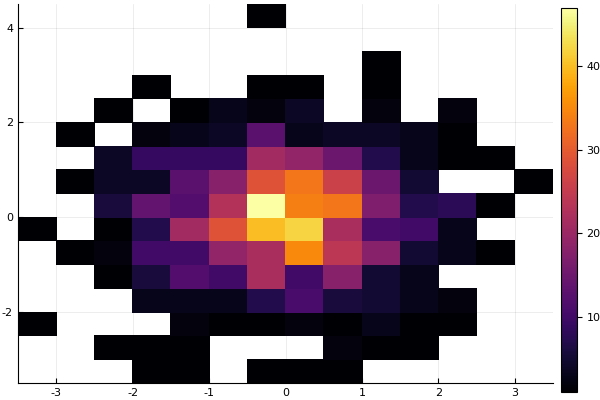

In [8]:
n = 1000
set1 = randn(n)
set2 = randn(n)
histogram2d(set1,set2,nbins=20,colorbar=true)

**Let's go back to our houses dataset and learn even more things about it!**

In [10]:
using DataFrames, CSV
houses = CSV.read("houses.csv")

filter_houses = houses[houses[:sq__ft] .> 0, :]
x = filter_houses[:sq__ft]
y = filter_houses[:price];

In [16]:
?histogram2d

search: histogram2d histogram2d! histogram! histogram



No documentation found.

`Plots.histogram2d` is a `Function`.

```
# 1 method for generic function "histogram2d":
histogram2d(args...; kw...) in Plots at /home/stefankarpinski/.julia/v0.6/RecipesBase/src/RecipesBase.jl:381
```


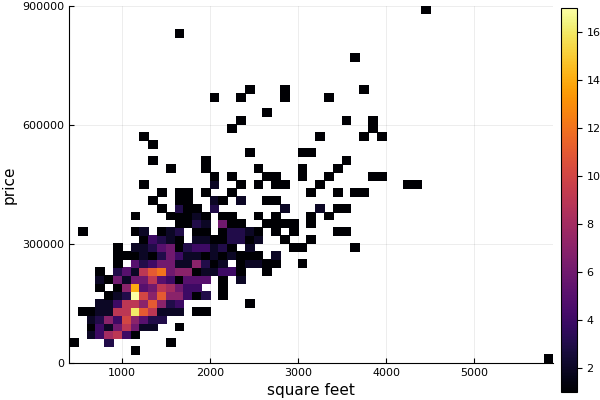

In [17]:
gh = histogram2d(x,y,nbins=50,colorbar=true)
xaxis!(gh,"square feet")
yaxis!(gh,"price")

Interesting! 

Most houses sold are in the range 1000-1500 and they cost approximately 150,000 dollars

*Let's see more stats plots.*

We can convince ourselves that random distrubutions are indeed very similar.

Let's do that through **box plots** and **violin plots**.

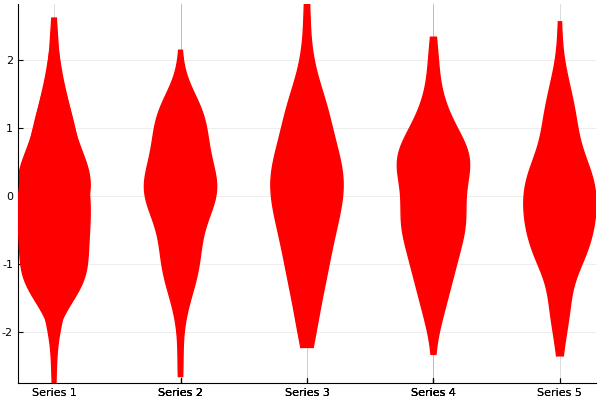

In [21]:
using StatPlots
y = randn(100, 6) # generate 6 random samples of size 1000 each
f2 = violin(["Series 1" "Series 2" "Series 3" "Series 4" "Series 5"], y, leg=false, color=:red)

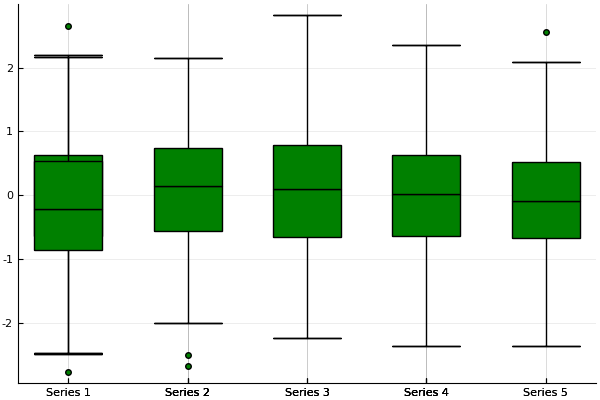

In [23]:
boxplot(["Series 1" "Series 2" "Series 3" "Series 4" "Series 5"], y, leg=false, color=:green)

These plots look almost identical, so we do have the same distribution indeed.

Let's study the price distributions in different cities in the houses dataset.

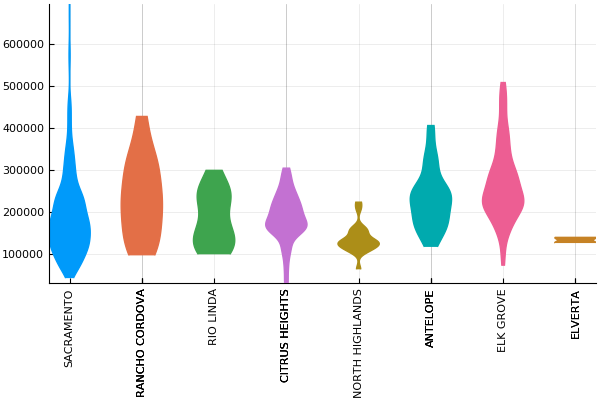

In [24]:
some_cities = ["SACRAMENTO","RANCHO CORDOVA","RIO LINDA","CITRUS HEIGHTS","NORTH HIGHLANDS","ANTELOPE","ELK GROVE","ELVERTA" ] # try picking pther cities!

fh = plot(xrotation=90)
for ucity in some_cities
    subs = filter_houses[filter_houses[:city].==ucity,:]
    city_prices = subs[:price]
    violin!(fh,[ucity],city_prices,leg=false)
end
display(fh)

## Part 3: Subplots are very easy!

You can create your own layout as follows.

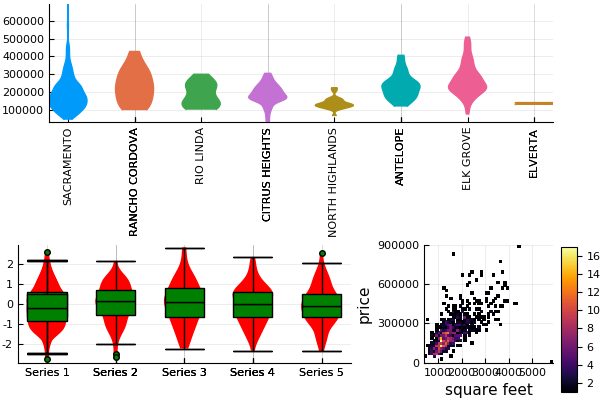

In [25]:
mylayout = @layout([a{0.5h};[b{0.7w} c]])
plot(fh,f2,gh,layout=mylayout,legend=false)

# this layout:
#  1 
# 2 3

## Part 4: Bonus plot, XKCD kind of plots with PyPlot

Let's load `PyPlot` and create some data.

In [26]:
using PyPlot
x = 1:100;
y = vcat(ones(Int,20),1:10,10*ones(70));

In [27]:
xkcd()
fig = figure()
ax = axes()
p = PyPlot.plot(x,y)
annotate("some \n caption",xy=[30;10],arrowprops=Dict("arrowstyle"=>"->"),xytext=[40;7])

PyObject Text(40,7,'some \n caption')

Modify the plot parameters:

In [28]:
xticks([])
yticks([])
xlabel("index")
ylabel("value")
title("our first xkcd plot")

ax[:spines]["top"][:set_color]("none") 
ax[:spines]["right"][:set_color]("none") 
ax[:spines]["left"][:set_color]("none") 
ax[:spines]["bottom"][:set_color]("none") 

fig[:canvas][:draw]()

/home/stefankarpinski/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'xkcd', u'Humor Sans', u'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


And finally, display the figure!

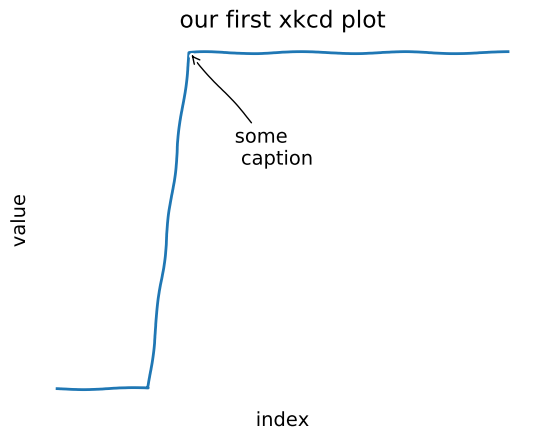

In [29]:
display(fig)